<a href="https://colab.research.google.com/github/muhammadrisma/Asia-Covid-19-Analysis/blob/main/Asia_covid_19_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns 
pd.set_option("display.max_columns",None) 
pd.set_option("display.max_rows",None) 
import warnings
warnings.filterwarnings("ignore")
from IPython.display import Image
sns.set(style="darkgrid", palette="pastel", color_codes=True)
sns.set_context("paper")
from datetime import datetime
import plotly.graph_objects as go
import plotly.express as px
import plotly.io as pio
pio.templates.default = "seaborn"
from plotly.subplots import make_subplots

from pathlib import Path
data_dir = Path('../input/images')

df = pd.read_excel("/content/CBD Final Exam owid-covid-data (1).xlsx")

In [ ]:
from datetime import timedelta
from urllib.request import urlopen
# interactive visualization
import plotly.express as px
import plotly.graph_objs as go
# import plotly.figure_factory as ff
from plotly.subplots import make_subplots
# for offline ploting
from plotly.offline import plot, iplot, init_notebook_mode
init_notebook_mode(connected=True)
# hide warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
print(f'Columns: {df.columns}')

Columns: Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'total_deaths', 'total_cases_per_million', 'new_cases_per_million',
       'total_deaths_per_million', 'total_vaccinations', 'people_vaccinated',
       'people_fully_vaccinated', 'population', 'population_density',
       'median_age', 'aged_65_older', 'aged_70_older'],
      dtype='object')


# Maps

In [ ]:
def plot_map(df, col, pal):
    df = df[df[col]>0]
    fig = px.choropleth(df, locations="location", locationmode='country names', 
                  color=col, hover_name="location", 
                  title=col, hover_data=[col], color_continuous_scale=pal)
#     fig.update_layout(coloraxis_showscale=False)
    fig.show()

## Confirmed

In [ ]:
plot_map(df, 'total_cases', 'matter')

## Total Death

In [ ]:
plot_map(df, 'total_deaths', 'matter')

# Top 20 countries having most deaths

In [ ]:
top_deaths = top.groupby(by = 'location')['total_deaths'].sum().sort_values(ascending = False).head(20).reset_index()
top_deaths

,location,total_deaths
0,India,204832.0
1,Indonesia,45334.0
2,Philippines,17145.0
3,Iraq,15433.0
4,Japan,10160.0
5,China,4845.0
6,Myanmar,3209.0
7,South Korea,1828.0
8,Malaysia,1492.0
9,Thailand,188.0


[Text(0, 0.5, 'Country'), Text(0.5, 0, 'Total cases')]

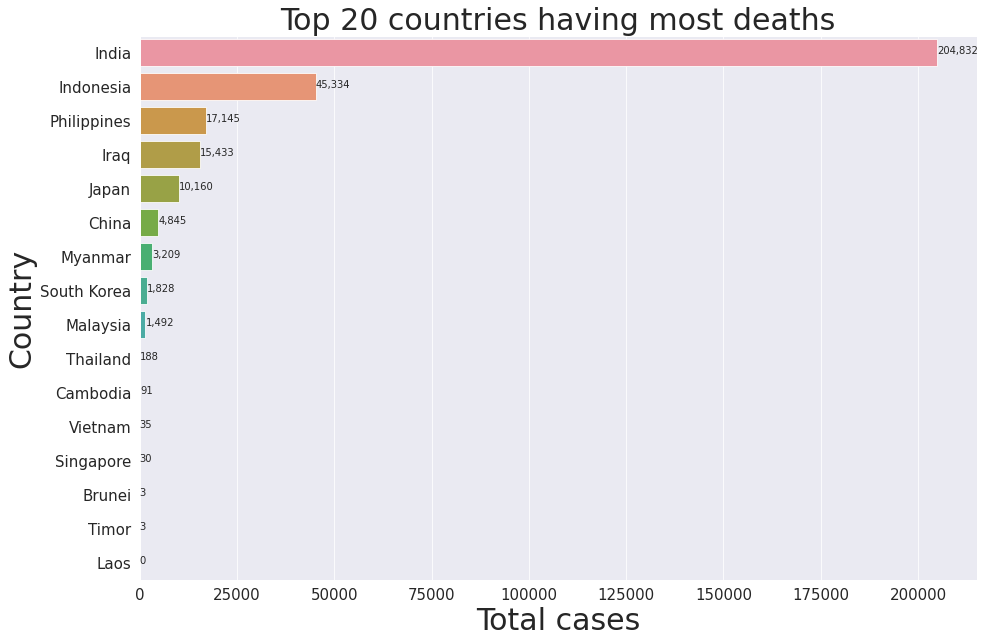

In [ ]:
plt.figure(figsize= (15,10))
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel("Total cases",fontsize = 30)
plt.ylabel('Country',fontsize = 30)
plt.title("Top 20 countries having most deaths" , fontsize = 30)
ax = sns.barplot(x = top_deaths.total_deaths, y = top_deaths.location)
for i, (value, name) in enumerate(zip(top_deaths.total_deaths,top_deaths.location)):
    ax.text(value, i-.05, f'{value:,.0f}',  size=10, ha='left',  va='center')
ax.set(xlabel='Total cases', ylabel='Country')

# Top 20 countries having most cases

In [ ]:
top_actives = df.groupby(by = 'location')['total_cases'].sum().sort_values(ascending = False).head(20).reset_index()
top_actives

,location,total_cases
0,India,2.502688e+09
1,Indonesia,2.130870e+08
2,Iraq,1.533161e+08
3,Philippines,1.304822e+08
4,Japan,6.922487e+07
5,China,4.041808e+07
6,Malaysia,3.943333e+07
7,Myanmar,2.342529e+07
8,Singapore,1.963004e+07
9,South Korea,1.687607e+07


[Text(0, 0.5, 'Country'), Text(0.5, 0, 'Total cases')]

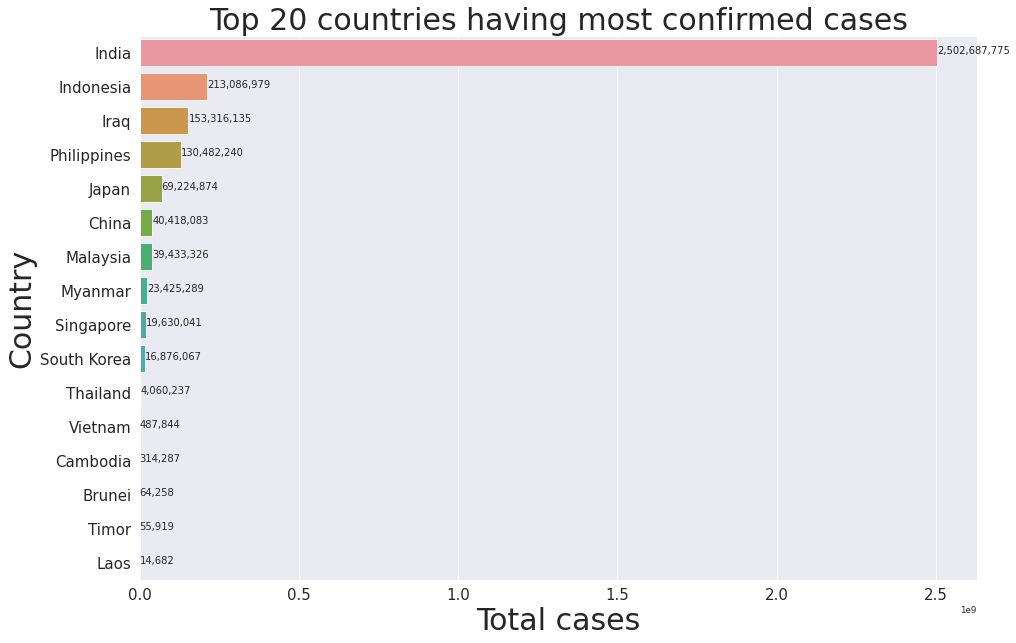

In [ ]:
plt.figure(figsize= (15,10))
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel("Total cases",fontsize = 30)
plt.ylabel('Country',fontsize = 30)
plt.title("Top 20 countries having most confirmed cases" , fontsize = 30)
ax = sns.barplot(x = top_actives.total_cases, y = top_actives.location)
for i, (value, name) in enumerate(zip(top_actives.total_cases, top_actives.location)):
    ax.text(value, i-.05, f'{value:,.0f}',  size=10, ha='left',  va='center')
ax.set(xlabel='Total cases', ylabel='Country')

# Top 20 countries in Asia having most new cases

In [ ]:
top = df[df['date'] == df['date'].max()]
top_casualities = top.groupby(by = 'location')['new_cases'].sum().sort_values(ascending = False).head(20).reset_index()
top_casualities

,location,new_cases
0,Philippines,8243.0
1,Japan,7914.0
2,Iraq,6926.0
3,Indonesia,5833.0
4,Malaysia,3332.0
5,Thailand,1871.0
6,Cambodia,880.0
7,South Korea,656.0
8,India,103.0
9,Laos,68.0


[Text(0, 0.5, 'Country'), Text(0.5, 0, 'Total cases')]

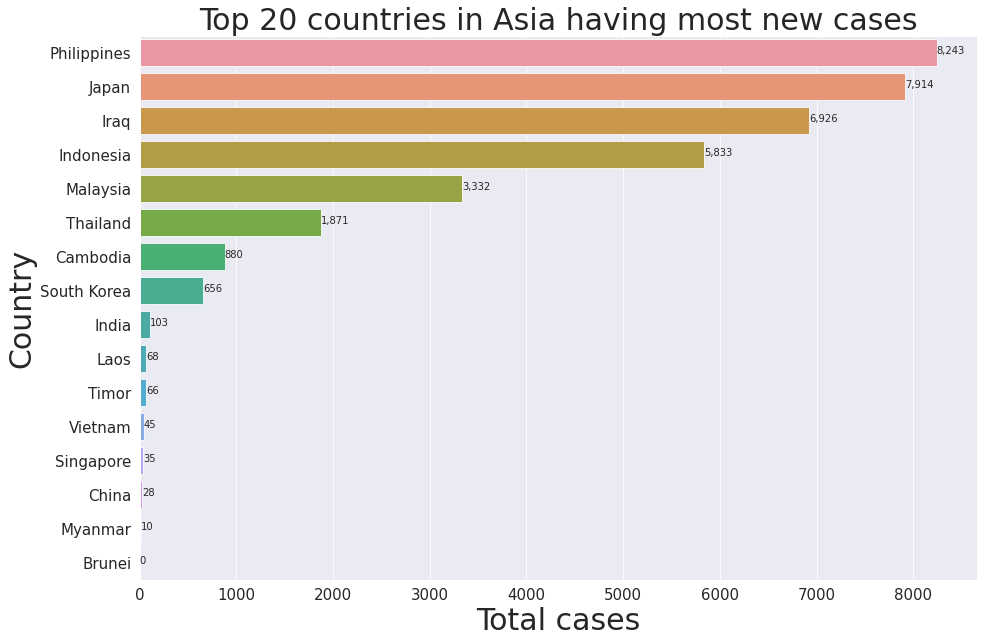

In [ ]:
plt.figure(figsize= (15,10))
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel("New cases",fontsize = 30)
plt.ylabel('Country',fontsize = 30)
plt.title("Top 20 countries in Asia having most new cases" , fontsize = 30)
ax = sns.barplot(x = top_casualities.new_cases, y = top_casualities.location)
for i, (value, name) in enumerate(zip(top_casualities.new_cases,top_casualities.location)):
    ax.text(value, i-.05, f'{value:,.0f}',  size=10, ha='left',  va='center')
ax.set(xlabel='Total cases', ylabel='Country')

# Analysis of most affected countries

# India

In [ ]:
india =  df[df.location == 'India']
india = india.groupby(by = 'date')['total_deaths', 'total_cases', 'new_cases', 'total_vaccinations'].sum().reset_index()
india = india.iloc[8:].reset_index().drop('index', axis = 1)
india['date'] = india['date'].apply(lambda x : datetime.strptime(x, "%Y-%m-%d"))
india.tail()

,date,total_deaths,total_cases,new_cases,total_vaccinations
443,2021-04-25,195123.0,17313163.0,352991.0,139185173.0
444,2021-04-26,197894.0,17636186.0,323023.0,142524947.0
445,2021-04-27,201187.0,17997113.0,360927.0,144879233.0
446,2021-04-28,204832.0,18376421.0,379308.0,147053392.0
447,2021-04-29,204832.0,18376524.0,103.0,0.0


# Indonesia

In [ ]:
indo =  df[df.location == 'Indonesia']
indo = indo.groupby(by = 'date')['total_deaths', 'total_cases', 'new_cases', 'total_vaccinations'].sum().reset_index()
indo = indo.iloc[8:].reset_index().drop('index', axis = 1)
indo['date'] = indo['date'].apply(lambda x : datetime.strptime(x, "%Y-%m-%d"))
indo.tail()

,date,total_deaths,total_cases,new_cases,total_vaccinations
411,2021-04-25,44594.0,1641194.0,4402.0,18570974.0
412,2021-04-26,44771.0,1647138.0,5944.0,18842883.0
413,2021-04-27,44939.0,1651794.0,4656.0,19230446.0
414,2021-04-28,45116.0,1657035.0,5241.0,19561472.0
415,2021-04-29,45334.0,1662868.0,5833.0,0.0


## Iraq

In [ ]:
iraq =  df[df.location == 'Iraq']
iraq = iraq.groupby(by = 'date')['total_deaths', 'total_cases', 'new_cases', 'total_vaccinations'].sum().reset_index()
iraq = iraq.iloc[8:].reset_index().drop('index', axis = 1)
iraq['date'] = iraq['date'].apply(lambda x : datetime.strptime(x, "%Y-%m-%d"))
iraq.tail()

,date,total_deaths,total_cases,new_cases,total_vaccinations
418,2021-04-25,15257.0,1031322.0,6034.0,0.0
419,2021-04-26,15303.0,1037858.0,6536.0,0.0
420,2021-04-27,15348.0,1045010.0,7152.0,0.0
421,2021-04-28,15392.0,1051868.0,6858.0,0.0
422,2021-04-29,15433.0,1058794.0,6926.0,0.0


# Philipines

In [ ]:
ph =  df[df.location == 'Philippines']
ph = ph.groupby(by = 'date')['total_deaths', 'total_cases', 'new_cases', 'total_vaccinations'].sum().reset_index()
ph = ph.iloc[8:].reset_index().drop('index', axis = 1)
ph['date'] = ph['date'].apply(lambda x : datetime.strptime(x, "%Y-%m-%d"))
ph.tail()

,date,total_deaths,total_cases,new_cases,total_vaccinations
443,2021-04-25,16783.0,997523.0,8143.0,0.0
444,2021-04-26,16853.0,1006428.0,8905.0,1767940.0
445,2021-04-27,16916.0,1013618.0,7190.0,1809801.0
446,2021-04-28,17031.0,1020495.0,6877.0,0.0
447,2021-04-29,17145.0,1028738.0,8243.0,0.0


## Asia Confirmed Cases

In [ ]:
grouped = df.groupby('date')['date', 'total_cases', 'total_deaths'].sum().reset_index()

fig = px.line(grouped, x="date", y="total_cases", 
              title="Asia Confirmed Cases Over Time")
fig.show()

fig = px.line(grouped, x="date", y="total_cases", 
              title="Asia Confirmed Cases (Logarithmic Scale) Over Time", 
              log_y=True)
fig.show()

# Comparison

In [ ]:
temp = df.groupby('date')['total_deaths', 'total_cases','total_vaccinations'].sum().reset_index()
temp = temp.melt(id_vars="date", value_vars=['total_deaths', 'total_cases','total_vaccinations'],
                 var_name='case', value_name='count')


fig = px.line(temp, x="date", y="count", color='case',
             title='Cases over time: Line Plot', color_discrete_sequence = ['cyan', 'red', 'orange'])
fig.show()


fig = px.area(temp, x="date", y="count", color='case',
             title='Cases over time: Area Plot', color_discrete_sequence = ['cyan', 'red', 'orange'])
fig.show()